In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv').drop_duplicates()

In [7]:
df.shape

(3591, 24)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,super built up area 3200(297.29 sq.m.)carpet a...,3,4,3+,...,NaN,3156.000000,0,1,0,1,0,1,143,1066.666667
1,flat,capital residences 360,sector 70,1.18,8138.0,1450.0,super built up area 1450(134.71 sq.m.)built up...,2,2,3,...,1400.0,1000.000000,0,0,0,1,0,0,140,725.000000
2,flat,umang winter hills,sector 77,0.71,5306.0,1338.0,super built up area 1342(124.68 sq.m.)carpet a...,2,2,2,...,NaN,810.000000,1,0,0,0,0,0,108,669.000000
3,flat,rof ananda,sector 95,0.20,5464.0,366.0,carpet area: 366.08 (34.01 sq.m.),1,1,1,...,NaN,366.080239,0,0,0,0,0,0,82,366.000000
4,flat,shree vardhman flora,sector 90,0.90,4615.0,1950.0,super built up area 1950(181.16 sq.m.),3,4,3,...,NaN,NaN,0,1,0,0,0,0,165,650.000000


In [9]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [ ]:
# built_up_area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

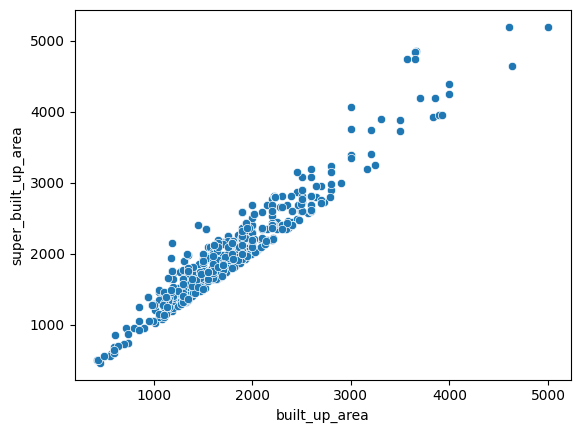

In [11]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area']) # strong linear relationship

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

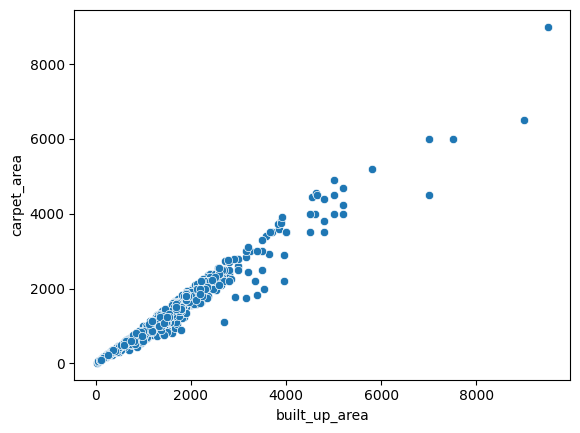

In [13]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area']) # very strong relationship

In [14]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

np.int64(0)

In [15]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [16]:
all_present_df.shape

(531, 24)

In [17]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [18]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [19]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [20]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [21]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,super built up area 3200(297.29 sq.m.)carpet a...,3,4,3+,...,NaN,3156.0,0,1,0,1,0,1,143,1066.666667
2,flat,umang winter hills,sector 77,0.71,5306.0,1338.0,super built up area 1342(124.68 sq.m.)carpet a...,2,2,2,...,NaN,810.0,1,0,0,0,0,0,108,669.000000
5,flat,pareena mi casa,sector 68,1.10,9016.0,1220.0,super built up area 1245(115.66 sq.m.)carpet a...,2,2,3,...,NaN,1225.0,0,0,0,0,0,0,106,610.000000
9,flat,shyam apartment,sector 5,0.26,3714.0,700.0,super built up area 700(65.03 sq.m.)carpet are...,2,1,2,...,NaN,530.0,0,0,0,0,0,0,0,350.000000
33,flat,dlf the primus,sector 82,1.87,10395.0,1799.0,super built up area 1799(167.13 sq.m.)carpet a...,3,3,3,...,NaN,1538.0,0,0,0,1,0,0,38,599.666667


In [22]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [23]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-23-a2fefc960aa3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
<ipython-input-23-a2fefc960aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_

In [24]:
df.update(sbc_df)

In [25]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [26]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [27]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,shree vardhman flora,sector 90,0.90,4615.0,1950.0,super built up area 1950(181.16 sq.m.),3,4,3,...,NaN,NaN,0,1,0,0,0,0,165,650.000000
6,flat,sahara grace,sector 28,5.50,14612.0,3764.0,super built up area 3764(349.69 sq.m.),4,5,3+,...,NaN,NaN,0,1,0,0,1,1,8,941.000000
12,flat,dlf the skycourt,sector 86,1.50,7895.0,1900.0,super built up area 1900(176.52 sq.m.),3,3,1,...,NaN,NaN,0,0,0,0,1,0,49,633.333333
13,flat,maruti vihar,sector 28,1.00,9091.0,1100.0,super built up area 1100(102.19 sq.m.),1,1,1,...,NaN,NaN,1,0,0,1,0,1,80,1100.000000
19,flat,nbcc heights,sector 89,0.75,6579.0,1140.0,super built up area 1140(105.91 sq.m.),2,2,2,...,NaN,NaN,0,0,0,0,0,0,0,570.000000


In [28]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-28-554030e2e595>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
<ipython-input-28-554030e2e595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [29]:
df.update(sb_df)

In [30]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [31]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [32]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,rof ananda,sector 95,0.20,5464.0,366.0,carpet area: 366.08 (34.01 sq.m.),1,1,1,...,NaN,366.080239,0,0,0,0,0,0,82,366.000000
7,flat,sidhartha ncr greens,sector 95,0.96,6202.0,1548.0,carpet area: 1548 (143.81 sq.m.),3,3,3,...,NaN,1548.000000,0,0,1,1,0,0,8,516.000000
10,flat,supertech araville,sector 79,0.83,5425.0,1530.0,carpet area: 1530 (142.14 sq.m.),2,2,3,...,NaN,1530.000000,1,0,0,0,0,2,49,765.000000
11,flat,la vida by tata housing,sector 113,3.35,12444.0,2692.0,carpet area: 2692 (250.09 sq.m.),4,4,3+,...,NaN,2692.000000,1,1,0,0,0,0,174,673.000000
17,flat,suposhaa smartworld orchard,sector 61,2.25,14526.0,1549.0,carpet area: 1549 (143.91 sq.m.),3,3,2,...,NaN,1549.000000,0,0,0,0,0,0,0,516.333333


In [33]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-33-747bc7ee3c0e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
<ipython-input-33-747bc7ee3c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [34]:
df.update(c_df)

In [35]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


<Axes: xlabel='built_up_area', ylabel='price'>

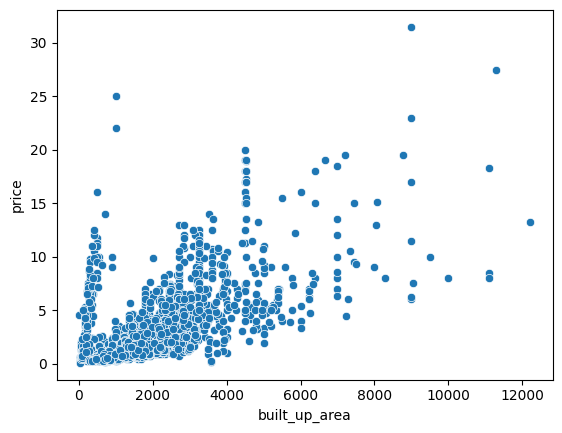

In [37]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [38]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [39]:
anamoly_df.sample(5)

,price,area,built_up_area
2094,2.85,1975.000000,1800.0
1725,3.30,2150.000000,1640.0
767,6.50,1934.984520,1935.0
2465,6.15,2250.027439,270.0
406,3.75,1620.010368,333.0


In [40]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [41]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

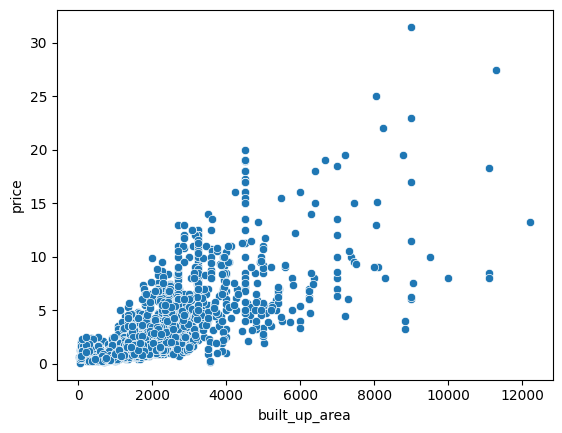

In [43]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [44]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [45]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience lagoon,sector 24,4.25,13281.0,3,4,3+,3.0,North-East,Old Property,3201.0,0,1,0,1,0,1,143
1,flat,capital residences 360,sector 70,1.18,8138.0,2,2,3,7.0,East,New Property,1400.0,0,0,0,1,0,0,140
2,flat,umang winter hills,sector 77,0.71,5306.0,2,2,2,6.0,North-West,Relatively New,1057.0,1,0,0,0,0,0,108
3,flat,rof ananda,sector 95,0.20,5464.0,1,1,1,10.0,West,Relatively New,407.0,0,0,0,0,0,0,82
4,flat,shree vardhman flora,sector 90,0.90,4615.0,3,4,3,4.0,East,Relatively New,1765.0,0,1,0,0,0,0,165


In [46]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,18
facing,1026


In [47]:
# floor Number

In [49]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
15,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.000000,1,1,1,1,0,0,0
76,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.000000,0,0,0,0,0,0,0
152,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.002258,0,0,0,0,0,0,0
227,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.000000,0,1,1,1,0,1,114
430,house,independent,sector 2,2.50,5472.0,3,2,1,NaN,NaN,Old Property,4000.000000,0,0,0,0,0,0,8
1465,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.000000,1,1,1,1,0,2,0
1478,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.000000,0,0,0,0,0,0,9
1605,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.000000,0,1,0,0,0,0,59
1864,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.000000,0,1,1,1,0,0,88
2009,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.000000,0,0,0,0,0,0,0


In [50]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [51]:
df['floorNum'].fillna(2.0,inplace=True)

<ipython-input-51-4d4ca364c16c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [ ]:
# facing

In [52]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
facing,1026


In [53]:
1026/df.shape[0]

0.2857142857142857

<Axes: ylabel='count'>

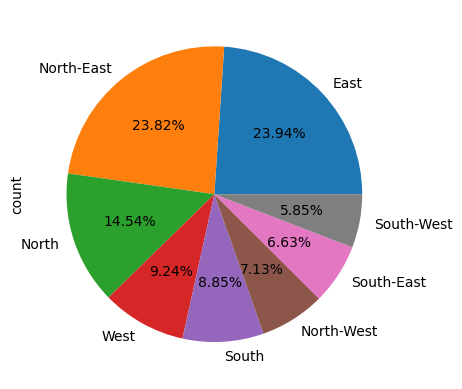

In [54]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [55]:
df.drop(columns=['facing'],inplace=True)

In [56]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3538,flat,krisumi waterfall residences,sector 36,3.65,14381.0,3,3,2,17.0,New Property,2297.0,0,0,0,0,0,0,31
1560,flat,bptp terra,sector 37,1.55,8559.0,3,3,3+,11.0,Relatively New,1639.0,0,0,0,0,0,0,79
1377,flat,dlf regency park,sector 28,2.30,11819.0,3,3,3,7.0,Moderately Old,1777.0,0,1,0,0,0,0,117
3326,flat,dlf regency park,sector 28,1.24,12400.0,2,2,3+,19.0,Moderately Old,1050.0,0,0,0,1,0,1,157
2139,flat,alpha corp gurgaonone,sector 84,1.49,7590.0,3,3,3,6.0,Relatively New,1833.0,0,1,0,0,0,0,28


In [57]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [58]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2009,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [59]:
df.drop(index=[2009],inplace=True)

In [60]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [61]:
# age possession contains undefined values that are needed to be treated

In [62]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1613
New Property,561
Moderately Old,555
Old Property,301
Undefined,297
Under Construction,263


In [63]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
22,flat,breeze global heights,sector 33,0.40,6421.0,2,2,2,4.0,Undefined,623.0,0,0,0,0,0,0,0
32,flat,unitech sunbreeze,sector 69,1.00,5476.0,4,3,0,0.0,Undefined,1826.0,0,0,0,0,0,0,0
34,flat,lavanya apartments,sector 81,0.90,5056.0,3,3,0,7.0,Undefined,1780.0,0,0,0,0,0,0,0
72,house,independent,sector 5,0.75,6410.0,2,2,0,1.0,Undefined,130.0,0,0,0,0,0,0,0
73,flat,shapoorji pallonji joyville gurugram,sector 102,0.95,10383.0,2,2,2,14.0,Undefined,915.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,house,independent,sector 12,2.75,12343.0,6,6,2,2.0,Undefined,2228.0,0,0,0,0,0,0,0
3676,flat,supertech hilltown,sector 2,0.80,5556.0,3,2,3,8.0,Undefined,1440.0,0,0,0,0,0,0,0
3686,flat,ansal plaza,sector 2,1.00,10000.0,2,3,0,1.0,Undefined,1000.0,0,0,0,0,0,0,0
3696,flat,central park flower valley,sohna,1.20,6742.0,3,3,0,11.0,Undefined,1780.0,0,0,0,0,0,0,66


In [64]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [65]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [66]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1728
Moderately Old,599
New Property,596
Old Property,338
Under Construction,282
Undefined,47


In [67]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [68]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [69]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1746
Moderately Old,606
New Property,597
Old Property,341
Under Construction,282
Undefined,18


In [70]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [71]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [72]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1746
Moderately Old,624
New Property,597
Old Property,341
Under Construction,282


In [73]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [74]:
df.shape

(3590, 18)

In [75]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)